# 6.6 LSA

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

### Load Data

In [2]:
data = pd.read_csv("news_articles.csv")

In [3]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
data_sample = data.sample(20).reset_index()

### Clean Data

In [6]:
# take just the content of the article, lowercase and remove punctuation
articles = data_sample['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

In [7]:
# stop word removal
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

In [8]:
# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

In [9]:
# stemming (done for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [10]:
articles

0     [novemb, 2000, florida, recount, grip, nation,...
1     [tesla, motor, maverick, maker, scrutini, fede...
2     [year, could, end, without, littl, bit, taylor...
3     [washington, hillari, clinton, assail, donald,...
4     [washington, russian, warplan, carri, airstrik...
5     [alli, mangel, learn, lose, vision, rare, cond...
6     [mose, allison, pianist, singer, songwrit, str...
7     [nomad, wander, necessari, surviv, came, stock...
8     [banjul, gambia, week, inaugur, anoth, countri...
9     [coverag, leak, 2005, audio, tape, donald, tru...
10    [within, span, last, summer, four, five, bigge...
11    [read, friday, storm, watch, latest, updat, hu...
12    [dhaka, bangladesh, bangladesh, govern, move, ...
13    [least, 27, peopl, shot, seven, fatal, period,...
14    [washington, presid, trump, plan, take, execut...
15    [shahram, amiri, emerg, shadow, spotlight, six...
16    [london, british, govern, announc, plan, tuesd...
17    [student, citi, colleg, new, york, flagshi

### Vectorization

In [11]:
# create dictionary of all words
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary(3659 unique tokens: ['10', '1787', '2000', '2004', '2008']...)


In [12]:
# vecotize using bag of words into a document term matrix
doc_term = [dictionary.doc2bow(text) for text in articles]

In [13]:
print(doc_term)

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 4), (43, 2), (44, 7), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 4), (55, 1), (56, 10), (57, 1), (58, 1), (59, 1), (60, 2), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 3), (68, 1), (69, 2), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 2), (82, 1), (83, 3), (84, 5), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 10), (103, 16), (104, 1), (105, 1), (106, 2), (107, 3), (108, 2), (109, 1), (110,

### LSA

In [14]:
# specify number of topics
num_topics = 2

In [21]:
# create LSA model
lsamodel = LsiModel(doc_term, num_topics=num_topics, id2word = dictionary) 
print(lsamodel.print_topics(num_topics=num_topics, num_words=5))

TypeError: __init__() got an unexpected keyword argument 'random_seed'

### Determine Number of Topics

In [16]:
# generate coherence scores to determine an optimum number of topics
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(doc_term, num_topics=num_topics_i, id2word = dictionary)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

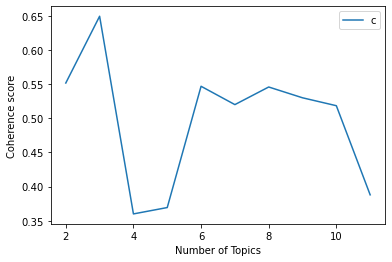

In [17]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
final_n_topics = 2
lsamodel_f = LsiModel(doc_term, num_topics=final_n_topics, id2word = dictionary) 
print(lsamodel_f.print_topics(num_topics=final_n_topics, num_words=5))

[(0, '0.525*"mr" + 0.364*"said" + 0.164*"would" + 0.154*"trump" + 0.140*"state"'), (1, '-0.603*"leas" + 0.328*"mr" + -0.273*"vehicl" + -0.185*"compani" + -0.157*"car"')]
